In [1]:
import pandas as pd

# Define file paths
file_path = "/Users/jarvis/Downloads/Monthly Prescription Drug Plan Formulary and Pharmacy Network Information/2025-01/2025_20250123/beneficiary cost file  20250131.txt"  # Example file

# Load file with '|' as the delimiter
df = pd.read_csv(file_path, delimiter="|")

# Save as CSV for Power BI and further analysis
df.to_csv("/Users/jarvis/pymycod/US_Formulary/beneficiary_cost_file.csv", index=False)

# Display sample
print(df.head())

  CONTRACT_ID  PLAN_ID  SEGMENT_ID  COVERAGE_LEVEL  TIER  DAYS_SUPPLY  \
0       H0022        1           0               1     1            1   
1       H0022        1           0               1     1            2   
2       H0022        1           0               1     1            4   
3       H0022        1           0               1     2            1   
4       H0022        1           0               1     2            2   

   COST_TYPE_PREF  COST_AMT_PREF  COST_MIN_AMT_PREF  COST_MAX_AMT_PREF  ...  \
0               0            0.0                  0                0.0  ...   
1               0            0.0                  0                0.0  ...   
2               0            0.0                  0                0.0  ...   
3               0            0.0                  0                0.0  ...   
4               0            0.0                  0                0.0  ...   

   COST_TYPE_MAIL_PREF  COST_AMT_MAIL_PREF  COST_MIN_AMT_MAIL_PREF  \
0               

In [2]:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the formulary data
df = pd.read_csv("beneficiary_cost_file.csv")

# Display basic info
print(df.info())
print(df.describe())

# Display first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165417 entries, 0 to 165416
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CONTRACT_ID                165417 non-null  object 
 1   PLAN_ID                    165417 non-null  int64  
 2   SEGMENT_ID                 165417 non-null  int64  
 3   COVERAGE_LEVEL             165417 non-null  int64  
 4   TIER                       165417 non-null  int64  
 5   DAYS_SUPPLY                165417 non-null  int64  
 6   COST_TYPE_PREF             165417 non-null  int64  
 7   COST_AMT_PREF              165417 non-null  float64
 8   COST_MIN_AMT_PREF          165417 non-null  int64  
 9   COST_MAX_AMT_PREF          165417 non-null  float64
 10  COST_TYPE_NONPREF          165417 non-null  int64  
 11  COST_AMT_NONPREF           165417 non-null  float64
 12  COST_MIN_AMT_NONPREF       165417 non-null  float64
 13  COST_MAX_AMT_NONPREF       16

,CONTRACT_ID,PLAN_ID,SEGMENT_ID,COVERAGE_LEVEL,TIER,DAYS_SUPPLY,COST_TYPE_PREF,COST_AMT_PREF,COST_MIN_AMT_PREF,COST_MAX_AMT_PREF,...,COST_TYPE_MAIL_PREF,COST_AMT_MAIL_PREF,COST_MIN_AMT_MAIL_PREF,COST_MAX_AMT_MAIL_PREF,COST_TYPE_MAIL_NONPREF,COST_AMT_MAIL_NONPREF,COST_MIN_AMT_MAIL_NONPREF,COST_MAX_AMT_MAIL_NONPREF,TIER_SPECIALTY_YN,DED_APPLIES_YN
0,H0022,1,0,1,1,1,0,0.0,0,0.0,...,0,0.0,0,0.0,2,0.0,0.0,0.0,N,N
1,H0022,1,0,1,1,2,0,0.0,0,0.0,...,0,0.0,0,0.0,2,0.0,0.0,0.0,N,N
2,H0022,1,0,1,1,4,0,0.0,0,0.0,...,0,0.0,0,0.0,2,0.0,0.0,0.0,N,N
3,H0022,1,0,1,2,1,0,0.0,0,0.0,...,0,0.0,0,0.0,2,0.0,0.0,0.0,N,N
4,H0022,1,0,1,2,2,0,0.0,0,0.0,...,0,0.0,0,0.0,2,0.0,0.0,0.0,N,N


/var/folders/g_/c4f93b1s3sb7z3s30n19hdzh0000gn/T/ipykernel_26448/779405182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["COVERAGE_LEVEL"], palette="pastel")


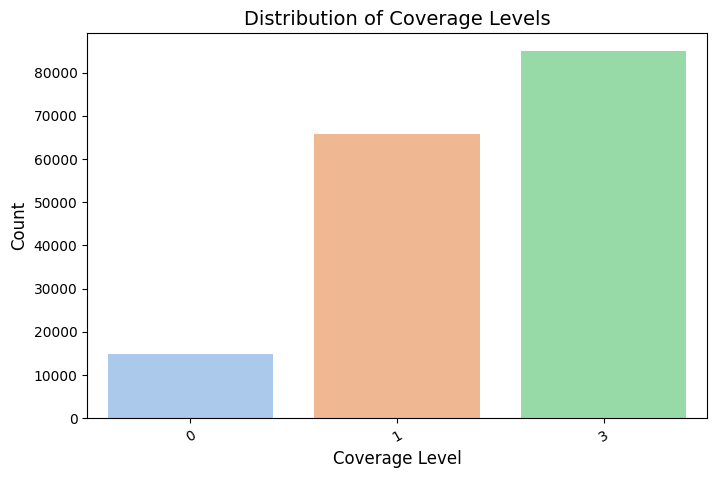

In [4]:
###### Count of Coverage Levels (Count Plot) ######
plt.figure(figsize=(8,5))
sns.countplot(x=df["COVERAGE_LEVEL"], palette="pastel")

plt.title("Distribution of Coverage Levels", fontsize=14)
plt.xlabel("Coverage Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)
plt.show()


# Helps understand how many plans offer basic vs. enhanced coverage.
# If enhanced plans are fewer, beneficiaries may have limited premium options.
# 0 - basic coverage, 1 - enhanced coverage, 3 - employer/union sponsored coverage

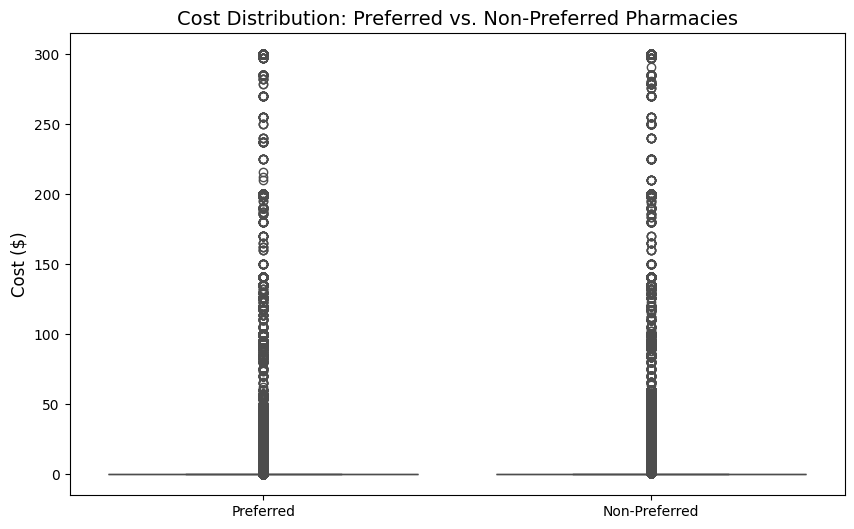

In [5]:
#### Cost Distribution for Preferred vs. Non-Preferred Pharmacies (Box Plot) ####
plt.figure(figsize=(10,6))
sns.boxplot(data=df[["COST_AMT_PREF", "COST_AMT_NONPREF"]], palette=["blue", "red"])

plt.title("Cost Distribution: Preferred vs. Non-Preferred Pharmacies", fontsize=14)
plt.ylabel("Cost ($)", fontsize=12)
plt.xticks(ticks=[0,1], labels=["Preferred", "Non-Preferred"])
plt.show()


# Shows if preferred pharmacies are significantly cheaper than non-preferred ones.
# If costs overlap too much, it suggests low cost benefits for preferred pharmacies.

/var/folders/g_/c4f93b1s3sb7z3s30n19hdzh0000gn/T/ipykernel_26448/1779276914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="TIER", y="COST_AMT_PREF", data=df, palette="coolwarm")


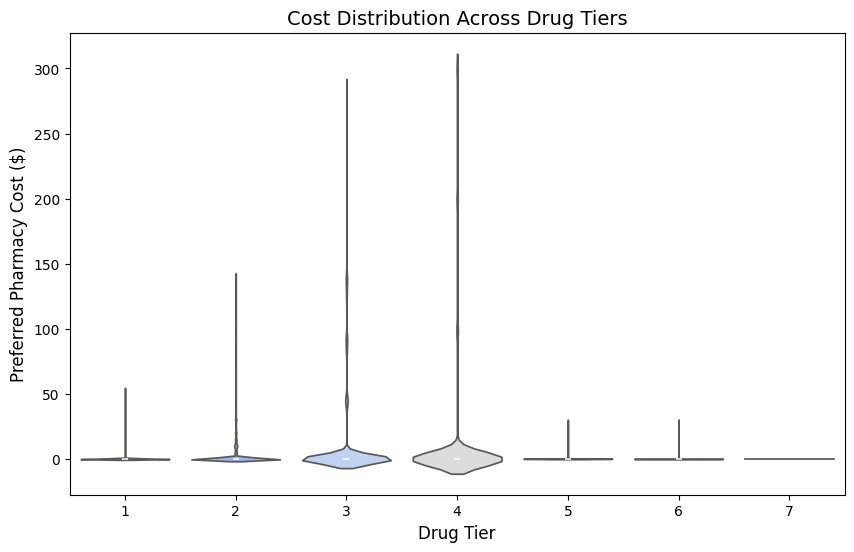

In [ ]:
#### Drug Tier Cost Distribution (Violin Plot) #####
plt.figure(figsize=(10,6))
sns.violinplot(x="TIER", y="COST_AMT_PREF", data=df, palette="coolwarm")

plt.title("Cost Distribution Across Drug Tiers", fontsize=14)
plt.xlabel("Drug Tier", fontsize=12)
plt.ylabel("Preferred Pharmacy Cost ($)", fontsize=12)
plt.show()


# Tier 1 drugs should have lower costs, while Tier 5 (specialty) should be expensive.
## If Tier 4/5 show wide variations, it suggests unstable pricing for higher-cost drugs.